In [1]:
import quandl
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
%matplotlib inline

<h1><center>Gold Prices: Driven by Inflation, Volatility, or Treasury Yields?</center></h1>
<h2><center>By: Aviral Agarwal</center></h2>


<h2><center>Introduction</center></h2>
Gold is one of the most hotly traded commodities in world. There are three main theories around what controls gold prices. As an asset that does not provide a yield, it is assumed to grow in value when the return on assets that do provide yields decreases. The first theory claims that yields do not directly have an impact on gold prices, instead inflation is what leads to the direct impact on gold price which is indirectly reflected in yields. The second group believes that real yields (real means adjusted for inflation) tend to be what controls gold prices. Recently, there has been a rise of an entirely different third theory on gold prices. When there is an increase in uncertainty or volatility in the global political and economic climate, that leads to an increase in gold prices, as gold has acted as a store of value for thousands of years.

In this tutorial, we attempt to explore the impact of inflation, volatility, and treasury yields on gold prices. We hope to determine which of the above theories has the most historical backing.


<h2><center>Data Gathering</center></h2>
We need to gather historical data on gold prices, inflation, volatility, and treasury yields.

Gold Prices can be best found through historical data on the futures contracts that are used to trade mass amounts of gold in the open market. Historical data can be found in the Wiki Continuous Futures database from NASDAQ’s data repository platform, Quandl, at https://www.quandl.com/data/CHRIS-Wiki-Continuous-Futures. The following code will allow us to gather daily prices on the gold continuous contract in the front from December 31st, 1974 to December 18th, 2020. Gold futures contracts tend to have a set date on which they expire on which a transaction for gold purchases will take place. As this data tracks the continuous contract in front, it will automatically provide data on the contract closest to expiry that has not yet expired. 

In [2]:
# set api key for quandl and get gold price data
quandl.ApiConfig.api_key = "SjL4KUocN14L9PemEa24"
goldData = quandl.get('CHRIS/CME_GC1')
goldData.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1974-12-31,191.0,191.5,182.7,183.9,NaN,183.9,512.0,237.0
1975-01-02,184.0,184.8,173.9,175.1,NaN,175.1,294.0,209.0
1975-01-03,173.0,175.5,170.5,174.7,NaN,174.7,174.0,216.0
1975-01-06,172.0,174.5,167.5,174.4,NaN,174.4,197.0,225.0
1975-01-07,171.0,174.0,168.5,173.4,NaN,173.4,98.0,240.0


This data contains 9 columns which are:

Date: Date for the current datapoint <br>
Open: Opening price of the contract for that day <br>
High: The highest price of contracts traded that day <br>
Low: The lowest price of contracts traded that day <br>
Last: The price of the last contract traded that day <br>
Change: The dollar change in contract price from the previous day <br>
Settle: The closing price of the contract for that day <br>
Volume: The number of contracts that were traded that day <br>
Previous Day Open Interest: The number of outstanding contracts that have yet to have their transaction completed


We can gather data on inflation by using monthly values of the Consumer Price Index (CPI), a well-known index used to track inflation. This can be found by downloading and then importing a CSV from the economic data provided by the Federal Reserve Bank of St. Louis at https://fred.stlouisfed.org/series/CPIAUCSL. The data provided is from January 1947 to November 2020.

In [3]:
# read inflation data from csv
inflationData = pd.read_csv("CPIAUCSL.csv")
inflationData.head()

,DATE,CPIAUCSL
0,1947-01-01,21.48
1,1947-02-01,21.62
2,1947-03-01,22.00
3,1947-04-01,22.00
4,1947-05-01,21.95


This data contains two columns:

Date: Date for the current datapoint <br>
CPIAUCSL: Cost of a basket of consumer goods in a specific month that costed 21.48 in January 1947


We can gather data on volatility using the Chicago Board Options Exchange's CBOE Volatility Index (VIX). This is a very popular index that tracks the stock market's expectation of volatility based on the options of stocks included in the S&P 500 index. Daily data from January 1st, 1990 to Dec 18th, 2020 on this can be found by downloading historical data from Yahoo Finance’s website at https://finance.yahoo.com/quote/%5EVIX/history?p=%5EVIX

In [4]:
# read volatility data from csv
volatilityData = pd.read_csv("^VIX.csv")
volatilityData.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1990-01-02,17.240000,17.240000,17.240000,17.240000,17.240000,0
1,1990-01-03,18.190001,18.190001,18.190001,18.190001,18.190001,0
2,1990-01-04,19.219999,19.219999,19.219999,19.219999,19.219999,0
3,1990-01-05,20.110001,20.110001,20.110001,20.110001,20.110001,0
4,1990-01-08,20.260000,20.260000,20.260000,20.260000,20.260000,0


This data contains seven columns:
    
Date: Date for the current datapoint <br>
Open: Opening value of the VIX index on that specific day <br>
High: Highest value of the VIX index on that specific day <br>
Low: Lowest value of the VIX index on that specific day <br>
Close: Closing value of the VIX index on that specific day <br>
Adj Close: Adjusted closing value of the VIX index on that specific day based on stock splits and dividends <br>
Volume: the number of transactions that took place of the VIX index (0 everyday as an index is not tradable)


We can also gather daily data on the Yield of the 10 Year Treasury Bond from January 1st, 1962 to December 18th, 2020 from Yahoo Finance at https://finance.yahoo.com/quote/%5ETNX/history?p=%5ETNX

In [5]:
# read bond yield data from csv
bondYieldData = pd.read_csv("^TNX.csv")
bondYieldData.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-02,4.06,4.06,4.06,4.06,4.06,0.0
1,1962-01-03,4.03,4.03,4.03,4.03,4.03,0.0
2,1962-01-04,3.99,3.99,3.99,3.99,3.99,0.0
3,1962-01-05,4.02,4.02,4.02,4.02,4.02,0.0
4,1962-01-07,NaN,NaN,NaN,NaN,NaN,NaN


This data contains seven columns:  <br>
Date: Date for the current datapoint <br>
Open: Opening Treasury Yield on that specific day <br>
High: Highest Treasury Yield on that specific day <br>
Low: Lowest Treasury Yield on that specific day <br>
Close: Closing Treasury Yield on that specific day <br>
Adj Close: Adjusted Treasury Yield on that specific day <br>
Volume: the number of transactions that took place of the Treasury Yield (0 everyday as an yield is simply a number, the bond itself is what is traded)


<h2><center>Data Cleaning</center></h2>
Now we would like to clean up our data

For the inflation data, we are interested in the percent inflation rather than the values of the basket of goods so we should calculate the monthly inflation and the yearly inflation and add that to the data. Also we should convert Date from strings to datetime objects.

In [6]:
#Lists to store caluclated inflation values
monthlyInflation = []
yearlyInflation = []

for index, row in inflationData.iterrows():
    #Covert inflation dates to datetime objects
    inflationData.at[index, "DATE"] = datetime.datetime.strptime(row["DATE"], "%Y-%m-%d")
    
    #if it is the first month then there is no previous data so inflation is 0
    if(index == 0):
        monthlyInflation.append(0)
    else:
        #calculate and store inflation from the previous month
        previousMonth = inflationData.iloc[index - 1].CPIAUCSL
        currentMonth = inflationData.iloc[index].CPIAUCSL
        inflation = ((currentMonth - previousMonth) / inflationData.iloc[index - 1].CPIAUCSL)*100
        monthlyInflation.append(inflation)
        
    #if it is the first year then there is no previous data so inflation is 0    
    if(index < 12):
        yearlyInflation.append(0)
    else:
        # calculate and store inflation from the previous year
        previousYear = inflationData.iloc[index - 12].CPIAUCSL
        currentYear = inflationData.iloc[index].CPIAUCSL
        inflation = ((currentYear - previousYear) / inflationData.iloc[index - 12].CPIAUCSL)*100
        yearlyInflation.append(inflation)
        
#add calculted inflation values to the table 
inflationData["monthlyInflation"] = monthlyInflation
inflationData["yearlyInflation"] = yearlyInflation

inflationData.head()

,DATE,CPIAUCSL,monthlyInflation,yearlyInflation
0,1947-01-01 00:00:00,21.48,0.000000,0.0
1,1947-02-01 00:00:00,21.62,0.651769,0.0
2,1947-03-01 00:00:00,22.00,1.757632,0.0
3,1947-04-01 00:00:00,22.00,0.000000,0.0
4,1947-05-01 00:00:00,21.95,-0.227273,0.0


Let us drop change, settle, volume, and previous day open interest columns from the gold price table as we will not need them. Then lets change the prices in the table so that they are inflation adjusted.

In [7]:
basketPriceIn1975 = 52.3

#drop the columns from the gold data table
goldData = goldData.drop("Change", axis=1)
goldData = goldData.drop("Settle", axis=1)
goldData = goldData.drop("Volume", axis=1)
goldData = goldData.drop("Previous Day Open Interest", axis=1)

#create lists to store real values for prices
realOpen = []
realHigh = []
realLow = []
realLast = []

for index, row in goldData.iterrows():
    #get current date and convert it to the first of the month to get inflation for current month
    currentDate = index.to_pydatetime()
    currentDate = currentDate.replace(day=1)
    #Check if current datapoint isn't from december as we don't have inflation for december
    if(currentDate != datetime.datetime(2020, 12, 1)):
        #calculate and store inflation adjusted gold prices
        currBasketPrice = inflationData.loc[inflationData['DATE'] == currentDate]["CPIAUCSL"].values.item(0)
        realOpen.append(row["Open"] * (basketPriceIn1975 / currBasketPrice))
        realHigh.append(row["High"] * (basketPriceIn1975 / currBasketPrice))
        realLow.append(row["Low"] * (basketPriceIn1975 / currBasketPrice))
        realLast.append(row["Last"] * (basketPriceIn1975 / currBasketPrice))
    #Use november 2020 inflation data for december 2020
    else:
        basketPriceInNov2020 = 260.817
        realOpen.append(row["Open"] * (basketPriceIn1975 / basketPriceInNov2020))
        realHigh.append(row["High"] * (basketPriceIn1975 / basketPriceInNov2020))
        realLow.append(row["Low"] * (basketPriceIn1975 / basketPriceInNov2020))
        realLast.append(row["Last"] * (basketPriceIn1975 / basketPriceInNov2020))

#Add calculated values to the dataframe
goldData["realOpen"] = realOpen
goldData["realHigh"] = realHigh
goldData["realLow"] = realLow
goldData["realLast"] = realLast
    
goldData.head()

,Open,High,Low,Last,realOpen,realHigh,realLow,realLast
Date,,,,,,,,
1974-12-31,191.0,191.5,182.7,183.9,192.472062,192.975915,184.108092,185.317341
1975-01-02,184.0,184.8,173.9,175.1,184.000000,184.800000,173.900000,175.100000
1975-01-03,173.0,175.5,170.5,174.7,173.000000,175.500000,170.500000,174.700000
1975-01-06,172.0,174.5,167.5,174.4,172.000000,174.500000,167.500000,174.400000
1975-01-07,171.0,174.0,168.5,173.4,171.000000,174.000000,168.500000,173.400000


For the volatility data, we are not interested in the volume or adjusted close columns so we can drop them. We should also once again convert the date to datetime objects.

In [8]:
for index, row in volatilityData.iterrows():
    #Convert date to datetime objects
    volatilityData.at[index, "Date"] = datetime.datetime.strptime(row["Date"], "%Y-%m-%d")

#Drop the adjusted close and volume columns
volatilityData = volatilityData.drop('Adj Close', axis=1)
volatilityData = volatilityData.drop('Volume', axis=1)

volatilityData.head()

,Date,Open,High,Low,Close
0,1990-01-02 00:00:00,17.240000,17.240000,17.240000,17.240000
1,1990-01-03 00:00:00,18.190001,18.190001,18.190001,18.190001
2,1990-01-04 00:00:00,19.219999,19.219999,19.219999,19.219999
3,1990-01-05 00:00:00,20.110001,20.110001,20.110001,20.110001
4,1990-01-08 00:00:00,20.260000,20.260000,20.260000,20.260000


For the Treasury Yield data, we are not interested in the volume or adjusted close columns so we can drop them. We also are more interested in real yields instead of nominal yields so we should convert all the data to be inflation adjusted.

In [9]:
#Drop the adjusted close and volume columns
bondYieldData = bondYieldData.drop('Adj Close', axis=1)
bondYieldData = bondYieldData.drop('Volume', axis=1)

# create lists to store the yields after adjusted for inflation
realOpen = []
realHigh = []
realLow = []
realClose = []

for index, row in bondYieldData.iterrows():
    #Convert date to datetime
    bondYieldData.at[index, "Date"] = datetime.datetime.strptime(row["Date"], "%Y-%m-%d")
    
    #Find inflation for the current month
    currentDate = bondYieldData.at[index, "Date"]
    currentDate = currentDate.replace(day =1)
    #If current month is december 2020, use 0 inflation as data is not available
    if(currentDate != datetime.datetime(2020, 12, 1)):
        currInflation = inflationData.loc[inflationData['DATE'] == currentDate].yearlyInflation.values.item(0)
    else:
        currInflation = 0
    
    #Adjust and store price data for open, high, low, and close columns
    if(np.isnan(row["Open"])):
        realOpen.append(np.nan)
    else:
        realOpen.append(row["Open"] - currInflation)
    
    if(np.isnan(row["High"])):
        realHigh.append(np.nan)
    else:
        realHigh.append(row["High"] - currInflation)
        
    if(np.isnan(row["Low"])):
        realLow.append(np.nan)
    else:
        realLow.append(row["Low"] - currInflation)
        
    if(np.isnan(row["Close"])):
        realClose.append(np.nan)
    else:
        realClose.append(row["Close"] - currInflation)
        
#Add stored price data to dataframe
bondYieldData["realOpen"] = realOpen
bondYieldData["realHigh"] = realHigh
bondYieldData["realLow"] = realLow
bondYieldData["realClose"] = realClose

bondYieldData.head()

,Date,Open,High,Low,Close,realOpen,realHigh,realLow,realClose
0,1962-01-02 00:00:00,4.06,4.06,4.06,4.06,3.389759,3.389759,3.389759,3.389759
1,1962-01-03 00:00:00,4.03,4.03,4.03,4.03,3.359759,3.359759,3.359759,3.359759
2,1962-01-04 00:00:00,3.99,3.99,3.99,3.99,3.319759,3.319759,3.319759,3.319759
3,1962-01-05 00:00:00,4.02,4.02,4.02,4.02,3.349759,3.349759,3.349759,3.349759
4,1962-01-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h2><center>Exploratory Data Analysis</center></h2>

Lets start by making a graph of gold prices over time.

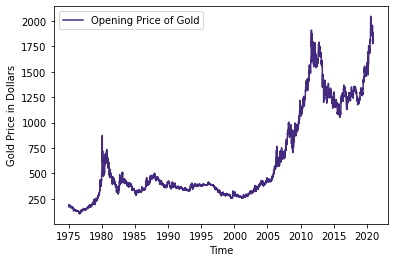

In [10]:
#Create x and y value lists for x:year and y: gold price
xVal = []
yVal = []
for index, row in goldData.iterrows():
    xVal.append(index)
    yVal.append(row["Open"])
#Plot x and y points
plt.plot(xVal, yVal, label="Opening Price of Gold", color=np.random.rand(3,))
plt.xlabel('Time')
plt.ylabel('Gold Price in Dollars')
plt.legend()
plt.show()

Based on the chart for the nominal gold prices we see there are three main bull markets for gold, first in the early 1980s, second after the dotcom crash in 2000 to 2013, and third from about 2018 to now. It seems that the post dotcom crash bull market for gold was strongest. However before making a judgement, lets make this graph again but using inflation adjusted prices.  

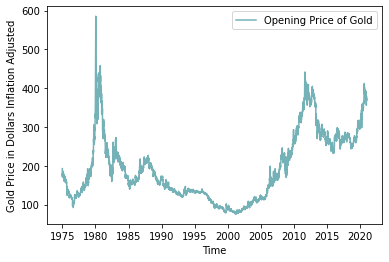

In [11]:
#Create x and y value lists for x: year and y: real gold price
xVal = []
yVal = []
for index, row in goldData.iterrows():
    xVal.append(index)
    yVal.append(row["realOpen"].item(0))
    
#Plot x and y points
plt.plot(xVal, yVal, label="Opening Price of Gold", color=np.random.rand(3,))
plt.xlabel('Time')
plt.ylabel('Gold Price in Dollars Inflation Adjusted')
plt.legend()
plt.show()

Looking at the real gold prices after adjusting for inflation we see a different picture. The true bull market for gold was in the 1980s. The peak price that gold hit back then has never ever been hit again. However, the speed at which there is an increase in gold prices in 1980 seems to look like that of a bubble where prices began to up vertically and then crashed back vertically as well. 

Lets create similar charts for inflation, VIX, and bond yields as well to see how their values have changed over time

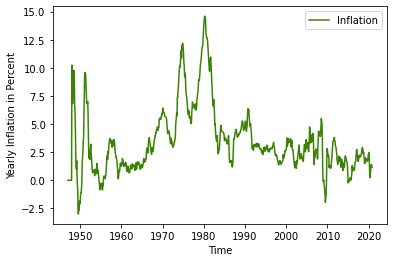

In [12]:
#Create x and y value lists for x: year and y: yearly inflation
xVal = []
yVal = []
for index, row in inflationData.iterrows():
    xVal.append(row["DATE"])
    yVal.append(row["yearlyInflation"])

#Plot x and y points
plt.plot(xVal, yVal, label="Inflation", color=np.random.rand(3,))
plt.xlabel('Time')
plt.ylabel('Yearly Inflation in Percent')
plt.legend()
plt.show()

This chart for inflation shows that inflation was very high back in the 1980s, however, there has been a steady decline since then.

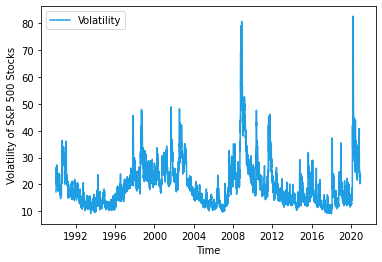

In [13]:
#Create x and y value lists for x: year and y: volatility
xVal = []
yVal = []
for index, row in volatilityData.iterrows():
    xVal.append(row["Date"])
    yVal.append(row["Open"])

#Plot x and y points
plt.plot(xVal, yVal, label="Volatility", color=np.random.rand(3,))
plt.xlabel('Time')
plt.ylabel('Volatility of S&P 500 Stocks')
plt.legend()
plt.show()

This chart shows that volatility has been low since 1990 except for the two major peaks in 2009 and 2020 when the entire stock market crashed.

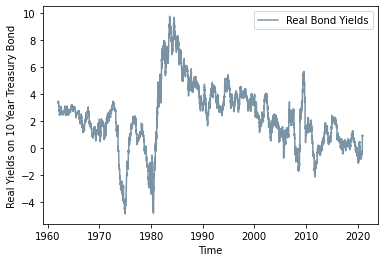

In [14]:
#Create x and y value lists for x: year and y: bond yield
xVal = []
yVal = []
for index, row in bondYieldData.iterrows():
    if(not(pd.isnull(row['realOpen']) or np.isnan(row['realOpen']))):
        xVal.append(row["Date"])
        yVal.append(row["realOpen"])
    
#Plot x and y points
plt.plot(xVal, yVal, label="Real Bond Yields", color=np.random.rand(3,))
plt.xlabel('Time')
plt.ylabel('Real Yields on 10 Year Treasury Bond')
plt.legend()
plt.show()

This chart shows almost an inverse of the inflation chart early on till the late 1980s. However, after the 1980s, inflation and real bond yields seem to both trend downward together. 

<h2><center>Linear Regressions for Gold vs Inflation, Bond Yield, and Volatility</center></h2>

Lets start with inflation first as historically, gold has been most accepted to be an inflation hedge.

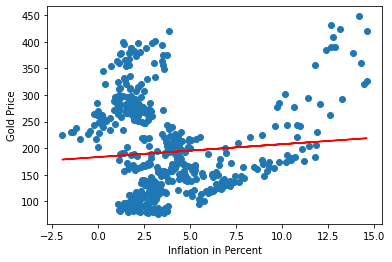

Coefficients: [[2.42044718]]
Coefficient of determination: 0.006616033268464605


In [15]:
#Create lists to store x and y points where x: yearly inflation and y: gold price
inflationX = []
goldPriceY = []

for index, row in inflationData.iterrows():
    #if the year is before 1975 we don't have data so continue
    if(row["DATE"] < datetime.datetime(1975,1,1)):
        continue
    #Get the closest possible date for when the market was open and gold was trading
    currentDate = row["DATE"]
    currentDateTimeStamp = pd.Timestamp(currentDate)
    counter = 2
    while(not currentDateTimeStamp in goldData.index.values):
        currentDate = row["DATE"]
        currentDate = currentDate.replace(day = counter)
        currentDateTimeStamp = pd.Timestamp(currentDate)
        counter = counter + 1
    # Add inflation and gold price to the lists
    inflationX.append(row["yearlyInflation"])
    goldPriceY.append(goldData.at[currentDateTimeStamp, "realOpen"])

#Plot the points in a scatter plot
plt.scatter(inflationX, goldPriceY)
plt.xlabel('Inflation in Percent')
plt.ylabel('Gold Price')

#Create a linear regression model
inflationReg = linear_model.LinearRegression()
inflationRegfit = inflationReg.fit([[x] for x in inflationX], [[y] for y in goldPriceY])

#Plot the line of best fit from the linear regression model
plt.plot(inflationX, [y for [y] in inflationRegfit.predict([[x] for x in inflationX])], color='red')
plt.show()

# Print out the coefficients and R^2 values
print('Coefficients:', inflationRegfit.coef_)
print('Coefficient of determination:', inflationRegfit.score([[x] for x in inflationX], [[y] for y in goldPriceY]))

At first glance the chart looks like that there is no correlation between inflation and gold prices. However, when inflation goes above 10% then there is a clear increase in gold prices. So there might be a slight positive relationship between gold prices and inflation. This seems to be matched up with the coefficient of 2.4 which shows a positive relationship, while the low R^2 of 0.006 shows that this correlation between inflation and gold prices is very weak.

Then lets take a look at bond yields and their relationship with gold prices.

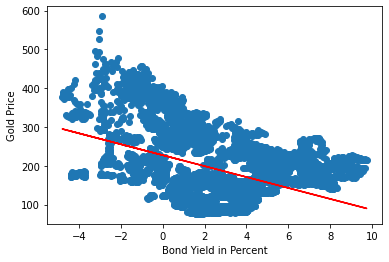

Coefficients: [[-14.09074536]]
Coefficient of determination: 0.16555640291647256


In [16]:
#Create lists to store x and y points where x: bond yield and y: gold price
yieldX = []
goldPriceY = []

for index, row in bondYieldData.iterrows():
    #if the year is before 1975 we don't have data so continue
    if(row["Date"] < datetime.datetime(1975,1,1)):
        continue
    #if bonds didn't trade that day then continue
    if(pd.isnull(row['realOpen']) or np.isnan(row['realOpen'])):
        continue
    #Get the closest possible date for when the market was open and gold was trading
    currentDate = row["Date"]
    currentDateTimeStamp = pd.Timestamp(currentDate)
    counter = 2
    while(not currentDateTimeStamp in goldData.index.values):
        currentDate = row["Date"]
        currentDate = currentDate.replace(day = counter)
        currentDateTimeStamp = pd.Timestamp(currentDate)
        counter = counter + 1
    #If gold futures contract data wasn't available that day continue
    if(np.isnan(goldData.at[currentDateTimeStamp, "realOpen"])):
        continue
    # Add bond yields and gold price to the lists
    yieldX.append(row["realOpen"])
    goldPriceY.append(goldData.at[currentDateTimeStamp, "realOpen"])

#Plot the points in a scatter plot
plt.scatter(yieldX, goldPriceY)
plt.xlabel('Bond Yield in Percent')
plt.ylabel('Gold Price')
    
#Create a linear regression model
bondYieldReg = linear_model.LinearRegression()
bondYieldRegfit = bondYieldReg.fit([[x] for x in yieldX], [[y] for y in goldPriceY])

#Plot the line of best fit from the linear regression model
plt.plot(yieldX, [y for [y] in bondYieldRegfit.predict([[x] for x in yieldX])], color='red')
plt.show()

# Print out the coefficients and R^2 values
print('Coefficients:', bondYieldRegfit.coef_)
print('Coefficient of determination:', bondYieldRegfit.score([[x] for x in yieldX], [[y] for y in goldPriceY]))

This chart seems to have a much stronger relationship than the one we previously looked at. There is a clear negative relationship between real bond yields and gold prices. As the real bond yield increases then the price of gold decreases. This is backed up once again by the coefficient of -14.09 and the R^2 value of 0.165 which is low but could be due to the possibility that a different curve would better fit the data instead of a line. 

Finally lets look at Volatility

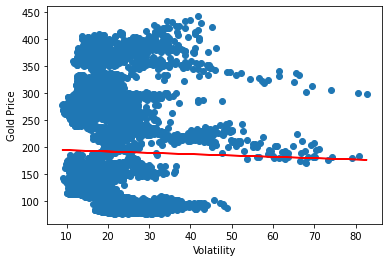

Coefficients: [[-0.24680861]]
Coefficient of determination: 0.0004685307746546963


In [17]:
#Create lists to store x and y points where x: volatility and y: gold price
volatilityX = []
goldPriceY = []

for index, row in volatilityData.iterrows():
    #Get the closest possible date for when the market was open and gold was trading
    currentDate = row["Date"]
    currentDateTimeStamp = pd.Timestamp(currentDate)
    counter = 2
    while(not currentDateTimeStamp in goldData.index.values):
        currentDate = row["Date"]
        currentDate = currentDate.replace(day = counter)
        currentDateTimeStamp = pd.Timestamp(currentDate)
        counter = counter + 1
    #If gold futures contract data wasn't available that day continue    
    if(np.isnan(goldData.at[currentDateTimeStamp, "realOpen"])):
        continue
    # Add volatility and gold price to the list
    volatilityX.append(row["Open"])
    goldPriceY.append(goldData.at[currentDateTimeStamp, "realOpen"])
    
#Plot the points in a scatter plot    
plt.scatter(volatilityX, goldPriceY)
plt.xlabel('Volatility')
plt.ylabel('Gold Price')

#Create a linear regression model
volatilityReg = linear_model.LinearRegression()
volatilityRegfit = volatilityReg.fit([[x] for x in volatilityX], [[y] for y in goldPriceY])

#Plot the line of best fit from the linear regression model
plt.plot(volatilityX, [y for [y] in volatilityRegfit.predict([[x] for x in volatilityX])], color='red')
plt.show()

# Print out the coefficients and R^2 values
print('Coefficients:', volatilityRegfit.coef_)
print('Coefficient of determination:', volatilityRegfit.score([[x] for x in volatilityX], [[y] for y in goldPriceY]))

This chart shows the worst relationship, there is no visible correlation here whatsoever between gold prices and volatility. This is completely at odds with what we saw before with the spikes in volatility in 2009 and 2020 coinciding with the increases in gold prices. This is also seen in the R^2 value which is almost zero at 0.00047. 

<h2><center>Conclusion</center></h2>

Based on the linear regressions done, it seems that Gold Prices have a weak relationship with treasury bond yields and no relationship to inflation and volatility. This is highly surprising as for a long-time people have believe in inflation being the main driving factor behind gold prices, yet the data shows that this is clearly not true. 

It might also be valuable to try to look at specific time periods and see the effects that each of these had on gold prices. Like specifically, the 1980s seemed to have very high inflation which is when gold prices were at their highest. It might very well be possible that the extremely high inflation of the time may have led to such high gold prices for that specific era. 

<h2><center>Additional Resources</center></h2>

To read more about the VIX: https://www.investopedia.com/terms/v/vix.asp <br>
To read more about Futures Contracts: https://www.investopedia.com/terms/f/futurescontract.asp <br>
To read more about Treasury Bonds: https://www.investopedia.com/terms/t/treasurybond.asp <br>
To read more about Consumer Price Index: https://www.investopedia.com/terms/c/consumerpriceindex.asp